# RFM Analysis

RFM Analysis adalah metode segmentasi (pengelompokkan pengguna) berdasarkan tiga buah kriteria yaitu.


1. Recency (R): Rentang waktu pengguna melakukan transaksi
2. Frequency (F): Jumlah transaksi yang dilakukan oleh pengguna
3. Monetization (M): Total uang yang dihabiskan oleh pengguna.

Teknik RFM pertama kali digunakan pada media marketing berbasis surat untuk mengirimkan promo yang tepat bagi pengguna.


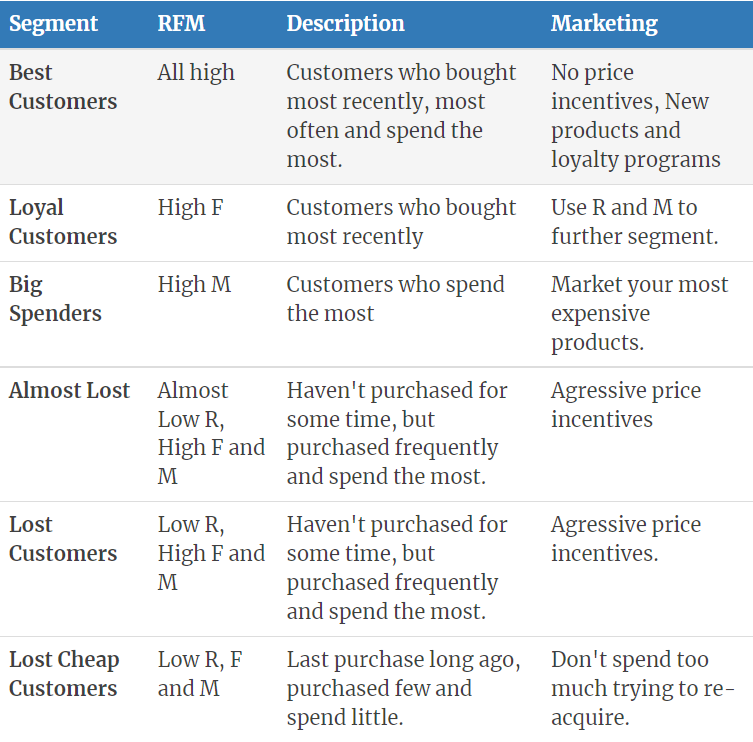

Keuntungan dari penggunaan metode RFM adalah.
1. Meningkatkan kesetiaan pelanggan terhadap layanan yang diberikan.
2. Efisiensi dana promo yang harus dibuat per interaksi yang didapat pada layanan.
3. Meningkatkan respon terhadap program (promo) yang disediakan oleh layanan.
4. Meningkatkan pendapatan perusahaan melalui 3 keuntungan di atas.

Salah satu cara yang dapat kita lakukan untuk melakukan analisis RFM adalah dengan mencari kelompok menggunakan algoritma K-Means berdasarkan nilai R, F, dan M seluruh pengguna.

# K-Means Algorithm

Algoritma K-Means bekerja dengan menggunakan hyperparameter k dan langkah di bawah ini.

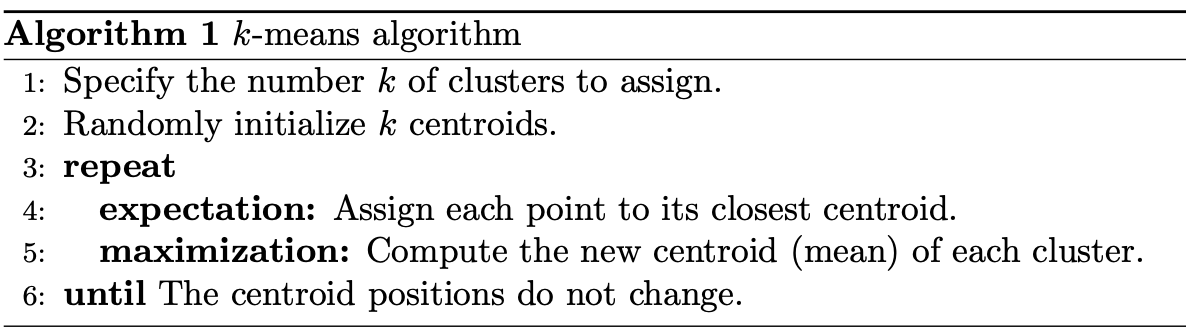

Perhatikan bahwa pada tahap expectation, proses assignment sebuah poin ke centroid terdekat dilakukan dengan melibatkan sebuah fungsi jarak (e.g. manhattan distance ataupun euclidian distance).

Perhatikan tautan pada url berikut untuk lebih memahami proses algoritma K-Means.

http://alekseynp.com/viz/k-means.html

## RFM Analysis menggunakan K-Means

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Retail_Data_Transactions.csv to Retail_Data_Transactions.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Retail_Data_Transactions.csv',parse_dates=['trans_date'])

In [ ]:
df.head(5)

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  125000 non-null  object        
 1   trans_date   125000 non-null  datetime64[ns]
 2   tran_amount  125000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [ ]:
print(df['trans_date'].min(), df['trans_date'].max())

2011-05-16 00:00:00 2015-03-16 00:00:00


In [ ]:
import datetime as dt
import numpy as np

recent_date = dt.datetime(2015,3,16)
df['recency']=recent_date - df['trans_date']
df['recency']=df['recency'] / np.timedelta64(1, 'D')
df.head()

,customer_id,trans_date,tran_amount,recency
0,CS5295,2013-02-11,35,763.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,748.0
3,CS1217,2011-11-16,99,1216.0
4,CS1850,2013-11-20,78,481.0


In [ ]:
df=df[df['recency'] < 365]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 1 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  32328 non-null  object        
 1   trans_date   32328 non-null  datetime64[ns]
 2   tran_amount  32328 non-null  int64         
 3   recency      32328 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
rfm = df.groupby('customer_id').agg({
    'recency': lambda x:x.min(), # mengambil nilai terkecil dari tanggal transaksi terakhir 16/3/2015 hingga tanggal saat ini => recency
    'customer_id': lambda x: len(x), # jumlah kemunculan customer_id  => jumlah frekuensi transaksi per customer
    'tran_amount': lambda x: x.sum() # jumlah total (sum) transaksi keseluruhan => nilai monetization
})

In [ ]:
rfm.rename(columns={
  'customer_id': 'frequency', 
  'tran_amount': 'monetization'
}, inplace=True)

In [ ]:
rfm.head()

,recency,frequency,monetization
customer_id,,,
CS1112,61.0,4,251
CS1113,35.0,6,393
CS1114,32.0,5,315
CS1115,11.0,3,248
CS1116,203.0,4,286


In [ ]:
df[df['customer_id'] == 'CS1115']

,customer_id,trans_date,tran_amount,recency
42007,CS1115,2014-04-09,98,341.0
78778,CS1115,2014-06-18,95,271.0
87202,CS1115,2015-03-05,55,11.0


In [ ]:
rfm = rfm.reset_index()
rfm.pop('customer_id')

X = rfm.to_numpy()

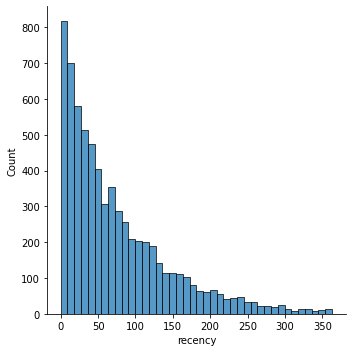

In [ ]:
import seaborn as sns
sns.displot(rfm['recency'])

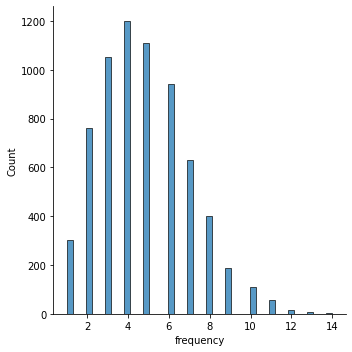

In [ ]:
sns.displot(rfm['frequency'])

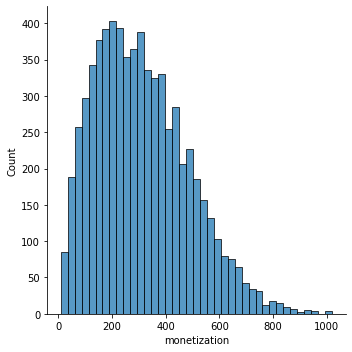

In [ ]:
sns.displot(rfm['monetization'])

## Data Preprocessing

Melalui histogram dari setiap fitur dapat terlihat bahwa setiap fitur memiliki rentang nilai yang berbeda. 

Sebelum analisis RFM menggunakan algoritma K-Means dilakukan alangkah lebih baiknya jika kita melakukan skalasi pada setiap fitur.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

Hal ini perlu kita lakukan dikarenakan algoritma K-Means bekerja dengan fungsi jarak. Seperti yang telah kita pelajari sebelumnya, fungsi jarak akan bekerja lebih baik jika setiap fitur memiliki skala yang sama.

## Initial Clustering Model

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters= 6)

In [ ]:
model.fit(X)

KMeans(n_clusters=6)

## Cluster Interpretation

In [ ]:
centers = model.cluster_centers_

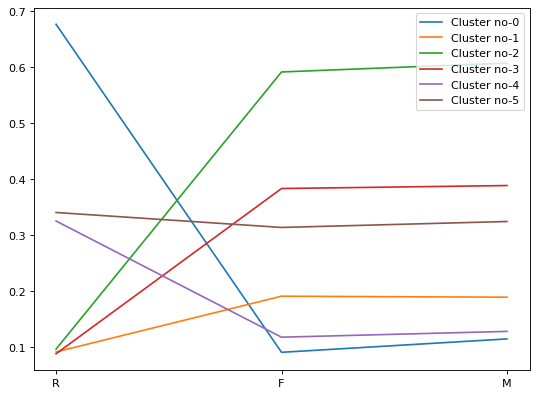

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# create data
x = ["R", "F", "M"]
  
# plot lines
for i in range(len(centers)):
  plt.plot(x, centers[i], label = "Cluster no-{}".format(i))
plt.legend()
plt.show()

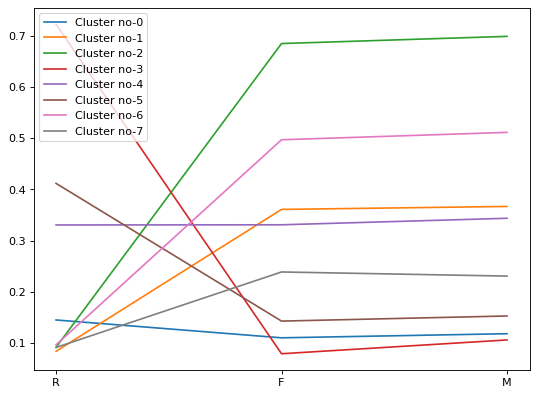

In [ ]:
model = KMeans(n_clusters= 8)
model.fit(X)

centers = model.cluster_centers_

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# create data
x = ["R", "F", "M"]
  
# plot lines
for i in range(len(centers)):
  plt.plot(x, centers[i], label = "Cluster no-{}".format(i))
plt.legend()
plt.show()

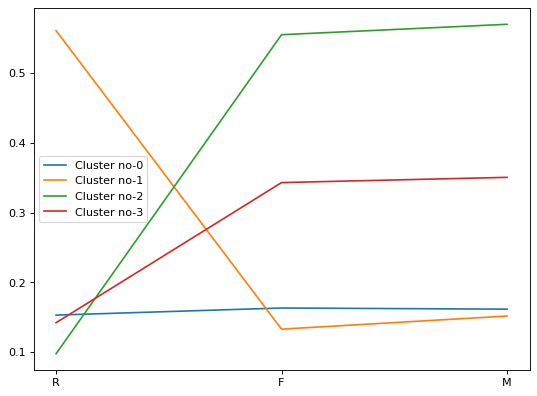

In [ ]:
model = KMeans(n_clusters= 4)
model.fit(X)

centers = model.cluster_centers_

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# create data
x = ["R", "F", "M"]
  
# plot lines
for i in range(len(centers)):
  plt.plot(x, centers[i], label = "Cluster no-{}".format(i))
plt.legend()
plt.show()

## Sum Squared Error

Sum Squared Error (SSE) merupakan salah satu metrik yang dapat digunakan untuk memilih nilai K terbaik pada algoritma K-Means. SSE pada algoritma K-Means dapat dihitung dengan menggunakan formula berikut ini.

$$ \text{SSE} =  \sum_{j=1}^{k}\sum_{i=1}^{n} {(x_i^{(j)} - c_j)^2}$$

dengan,
1. $x_i^{(j)}$ menyatakan data ke-i yang tergabung dalam cluster ke-$j$
2. $c_j$ menyatakan titik pusat (centroid) dari cluster ke-$j$

Semakin kecil nilai $SSE$ maka akan semakin baik titik pusat dari seluruh cluster merepresentasikan seluruh data.

In [ ]:
SSE = []
for i in range(1,11):
  model = KMeans(n_clusters= i)
  model.fit(X)
  SSE.append(model.inertia_)

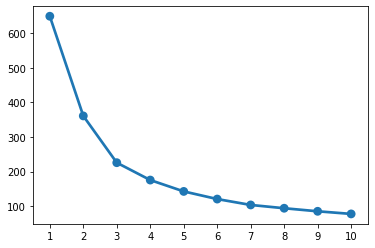

In [ ]:
sns.pointplot(x = list(range(1,11)),y= SSE)

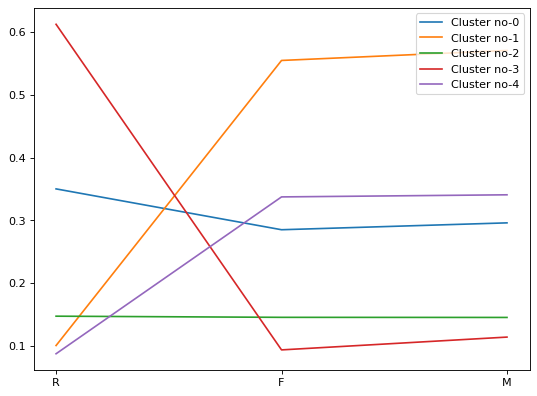

In [ ]:
model = KMeans(n_clusters= 5)
model.fit(X)

centers = model.cluster_centers_

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# create data
x = ["R", "F", "M"]
  
# plot lines
for i in range(len(centers)):
  plt.plot(x, centers[i], label = "Cluster no-{}".format(i))
plt.legend()
plt.show()

## Quartile-based Clustering

In [ ]:
rfm.head()

,recency,frequency,monetization
0,61.0,4,251
1,35.0,6,393
2,32.0,5,315
3,11.0,3,248
4,203.0,4,286


In [ ]:
quartiles = rfm.quantile(q=[i/5 for i in range(1,6)])
print(quartiles, type(quartiles))

     recency  frequency  monetization
0.2     16.0        3.0         153.0
0.4     38.0        4.0         241.0
0.6     70.0        5.0         338.0
0.8    125.0        7.0         455.0
1.0    363.0       14.0        1019.0 <class 'pandas.core.frame.DataFrame'>


In [ ]:
quartiles=quartiles.to_dict()
quartiles

{'frequency': {0.2: 3.0, 0.4: 4.0, 0.6: 5.0, 0.8: 7.0, 1.0: 14.0},
 'monetization': {0.2: 153.0, 0.4: 241.0, 0.6: 338.0, 0.8: 455.0, 1.0: 1019.0},
 'recency': {0.2: 16.0, 0.4: 38.0, 0.6: 70.0, 0.8: 125.0, 1.0: 363.0}}

In [ ]:
def RClass(x,p,d):
    for i in range(1,5):
      if x < d[p][i/5]:
        return 6-i
    return 1

In [ ]:
def FMClass(x,p,d):
    for i in range(1,5):
      if x < d[p][i/5]:
        return i
    return 5

In [ ]:
rfm['R_Quartile'] = rfm['recency'].apply(RClass, args=('recency',quartiles,))
rfm['F_Quartile'] = rfm['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfm['M_Quartile'] = rfm['monetization'].apply(FMClass, args=('monetization',quartiles,))

In [ ]:
rfm.head()

,recency,frequency,monetization,R_Quartile,F_Quartile,M_Quartile
0,61.0,4,251,3,3,3
1,35.0,6,393,2,4,4
2,32.0,5,315,2,4,3
3,11.0,3,248,1,2,3
4,203.0,4,286,5,3,3


In [ ]:
X = rfm[['R_Quartile','F_Quartile','M_Quartile']].to_numpy()

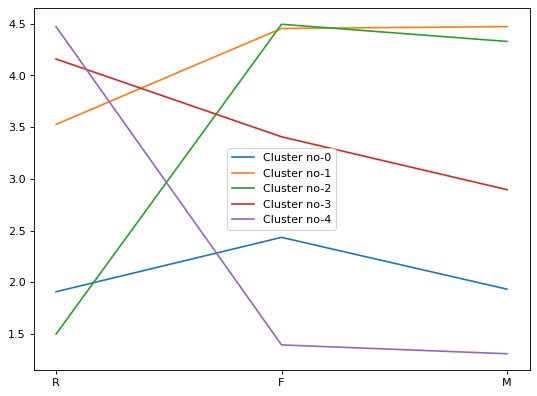

In [ ]:
model = KMeans(n_clusters= 5)
model.fit(X)

centers = model.cluster_centers_

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# create data
x = ["R", "F", "M"]
  
# plot lines
for i in range(len(centers)):
  plt.plot(x, centers[i], label = "Cluster no-{}".format(i))
plt.legend()
plt.show()

# Anomaly Detection

Proses deteksi anomali merupakan proses pencarian data yang terlihat berbeda dari keseluruhan data yang ada.

Terdapat banyak metode yang dapat digunakan untuk melakukan proses ini, salah satunya adalah DBSCAN.

## Density-based clustering (DBSCAN)

DBSCAN merupakan metode clustering (unsupervised machine learning) yang menghasilkan cluster di dalam data dengan melakukan langkah berikut.

1. **Intialization**: Membuat cluster dengan memilih suatu data (poin) dalam dataset dan
2. **Expansion**: Melakukan ekspansi terhadap cluster dengan memilih sekumpulan titik yang belum memiliki cluster dan berada di dekat titik-titik yang berada di dekat cluster. Proses ekspansi melibatkan suatu fungsi jarak antar dua buah data (titik).
3. **Evaluation**: Memastikan jumlah poin di dalam cluster melebih **jumlah minimal** yang diinginkan.

Melalui deskripsi di atas kita dapat melihat bahwa kualitas dari cluster yang dihasilkan algoritma melibatkan dua buah parameter, yaitu.
1. Jumlah cluster minimal
2. Jumlah sample minimal

Algoritma ini dapat digunakan untuk proses pendeteksian anomali dengan melihat titik-titik yang tidak tergabung ke dalam suatu cluster.

Untuk mempermudah pemahaman kita terhadap algoritma DBSCAN, anda dapat melihat tautan pada link berikut: https://youtu.be/_A9Tq6mGtLI?t=170.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import random, where
import matplotlib.pyplot as plt

In [ ]:
random.seed(7)
x, _ = make_blobs(n_samples=600, centers=2, cluster_std=1, center_box=(20, 10))

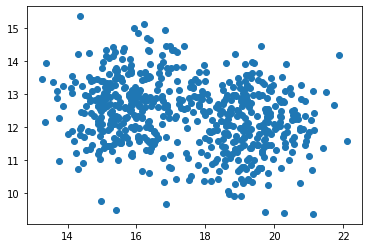

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [ ]:
dbscan = DBSCAN(eps = 1.4, min_samples = 50)
print(dbscan) 

DBSCAN(eps=1.4, min_samples=50)


In [ ]:
pred = dbscan.fit_predict(x)

In [ ]:
anom_index = where(pred == -1)
values = x[anom_index]

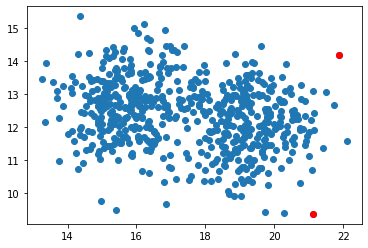

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

DBSCAN(eps=1.0, min_samples=90)


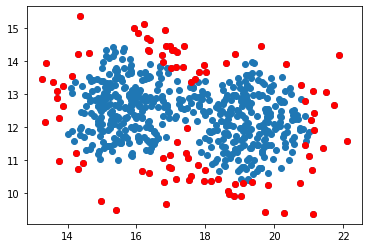

In [ ]:
dbscan = DBSCAN(eps = 1.0, min_samples = 90)
print(dbscan) 
pred = dbscan.fit_predict(x)

anom_index = where(pred == -1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

DBSCAN(eps=0.8, min_samples=50)


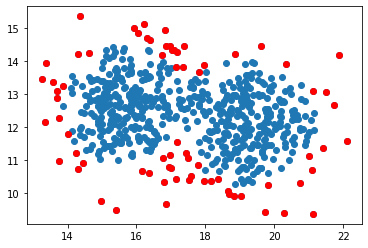

In [ ]:
dbscan = DBSCAN(eps = 0.8, min_samples = 50)
print(dbscan) 
pred = dbscan.fit_predict(x)

anom_index = where(pred == -1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()